# CS 133: Introduction to Colab
In the previous notebook you learned some Markdown language, how to mount your Google drive and how to link your Google Colab notebook to Kaggle and GitHub. Now we are going to try out some Python code and make some plots using data we read from a url.

**Here is your answer... Create a text box below**

## You can quickly create simulated data within jupyter notebook.
Here we create a normal distribution probability density plot

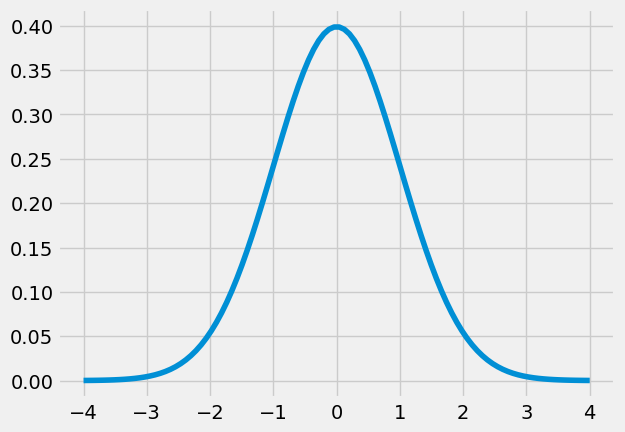

In [ ]:
'''Normal distribution probability density plot'''
### Import your libraries
import numpy as np
import scipy.stats as stats

### When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

mu = 0 # mean
std = 1 # variance
## Return 100 evenly spaced numbers over a specified interval (between -4 and 4)
x = np.linspace(start=-4, stop=4, num=100)
## A probability density function of a normal continuous random distribution
y = stats.norm.pdf(x, mu, std)
plots.plot(x, y)
plots.show()

# We can read in input data from url and do some analysis

In [ ]:
'''Read in input data from url'''
### Import your libraries
from datascience import *
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from urllib.request import urlopen
import re

### Write a function to take in url, read it and return data
def read_url(url):
    return re.sub('\\s+', ' ', urlopen(url).read().decode())


### Let's quickly read the book and count number of instances of characters
huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

Table().with_column('Chapters', huck_finn_chapters)

## Count the number of occurences of 'Tom' in each chapter
print("Number of occurences of Tom per chapter ", np.char.count(huck_finn_chapters, 'Tom'))

## Create a table with the counts of three names for each chapter: 'Tom', 'Jim', and 'Huck'.
counts = Table().with_columns([
    'Tom', np.char.count(huck_finn_chapters, 'Tom'),
    'Jim', np.char.count(huck_finn_chapters, 'Jim'),
    'Huck', np.char.count(huck_finn_chapters, 'Huck'),
])

## To see the count table, you can call the table and don't need to use print
counts

Number of occurences of Tom per chapter  [ 6 24  5  0  0  0  2  2  0  0  2  3  1  0  0  0  3  5  0  0  0  0  0  0  0
  0  0  1  0  0  1  4 19 15 14 18  9 32 11 11  8 30  6]


Tom,Jim,Huck
6,0,3
24,16,2
5,0,2
0,8,1
0,0,0
0,0,2
2,0,0
2,22,5
0,11,1
0,19,0


Chapter | Tom  | Jim  | Huck
1       | 6    | 0    | 3
2       | 30   | 16   | 5
3       | 35   | 16   | 7
4       | 35   | 24   | 8
5       | 35   | 24   | 8
6       | 35   | 24   | 10
7       | 37   | 24   | 10
8       | 39   | 46   | 15
9       | 39   | 57   | 16
10      | 39   | 76   | 16
... (33 rows omitted)


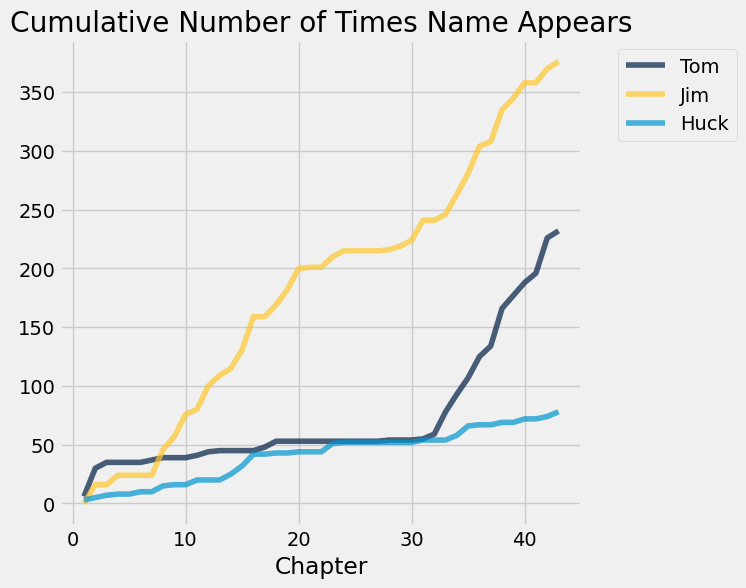

In [ ]:
'''Plot the cumulative counts for 43 chapters:'''
## A cumulative count plot will ask how many times in Chapter 1, then how many times in Chapter 1 and 2, and so on.


%matplotlib inline
## Table method references: https://www.data8.org/datascience/tables.html

## Create a new table and add the chapter numbers
cum_counts = Table().with_column('Chapter', np.arange(1, 44, 1))
## For loop use to iterate over the character names
for character_name in counts.labels:
  ## Add a column to the new table with each character's cumulative appearances
  cum_counts = cum_counts.with_column(
    character_name, counts.column(character_name).cumsum())
## Plot and add a title to the plot. Chapter numbers are on the x-axis
cum_counts.plot(column_for_xticks=0)
plots.title('Cumulative Number of Times Name Appears')
plots.show()

# Exercise `#`2
Now it is your turn. Try to do some word counting from the chapters in "The Little Women".  
Do the same thing as the above example for these 5 names: 'Amy', 'Beth', 'Jo', 'Laurie', 'Meg'.  
After you complete the exercise, **upload your code to your GitHub and send me a message via Canvas.**

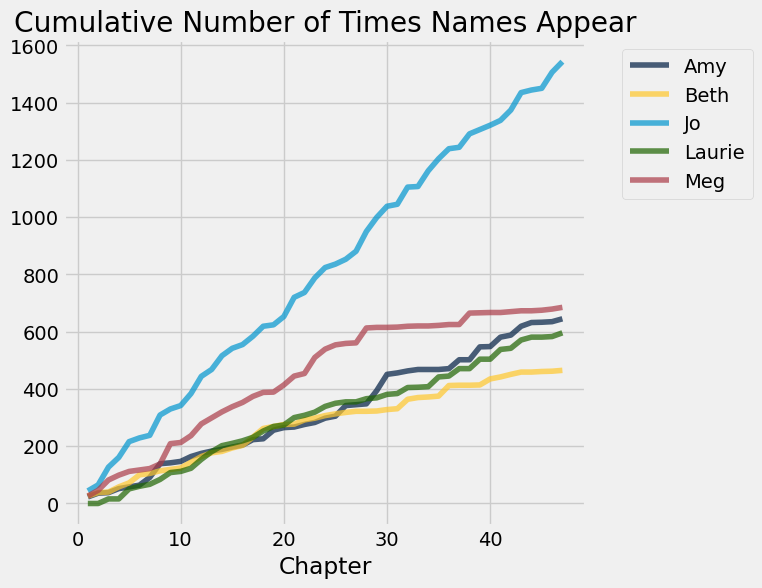

In [ ]:
'''Count character names in "The Little Women"'''
### url to "The Little Women" text
little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

# Plot the cumulative counts for the 47 chapters

# Your code here
%matplotlib inline

# table with counts of each name for each chapter
counts = Table().with_columns([
    'Amy', np.char.count(little_women_chapters, 'Amy'),
    'Beth', np.char.count(little_women_chapters, 'Beth'),
    'Jo', np.char.count(little_women_chapters, 'Jo'),
    'Laurie', np.char.count(little_women_chapters, 'Laurie'),
    'Meg', np.char.count(little_women_chapters, 'Meg'),
])


# initial table with 'Chapter' column
cum_counts = Table().with_column('Chapter', np.arange(1, 48, 1))

for character_name in counts.labels:
  # add columns for each character's cumulative appearance
  cum_counts = cum_counts.with_column(
      character_name, counts.column(character_name).cumsum())

# add title and plot
cum_counts.plot(column_for_xticks = 0)
plots.title('Cumulative Number of Times Names Appear')
plots.show()